In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import pdb

sys.path.append("../workstatation")
from imitation_learning.linear_regression import DMPTrajectory, load_data, train2
from utils.trajectory_utils import truncate_expert_data

Mean: [1.   0.97 0.95 0.92 0.89 0.87 0.85 0.82 0.8  0.78 0.76 0.74 0.72 0.7  0.68 0.66 0.64 0.62 0.61]
Std: [1024.94 1083.49 1145.39 1210.82 1279.99 1353.12 1430.42 1512.13 1598.52 1689.84 1786.37 1888.42
 1996.31 2110.35 2230.91 2358.36 2493.08 2635.51 2635.51]
Mean: [1.   0.97 0.95 0.92 0.89 0.87 0.85 0.82 0.8  0.78 0.76 0.74 0.72 0.7  0.68 0.66 0.64 0.62 0.61]
Std: [1024.94 1083.49 1145.39 1210.82 1279.99 1353.12 1430.42 1512.13 1598.52 1689.84 1786.37 1888.42
 1996.31 2110.35 2230.91 2358.36 2493.08 2635.51 2635.51]
Traj start: 422, end: 1528
Traj start: 318, end: 1254
Traj start: 478, end: 3597
Traj start: 491, end: 1615
Traj start: 275, end: 1502
Traj start: 154, end: 1628
ddq: max: -6.108, min: 6.156, mean: 0.004
ddq: max: -13.859, min: 11.057, mean: 0.000
ddq: max: -13.581, min: 12.603, mean: 0.004
ddq: max: -11.030, min: 10.651, mean: 0.001
ddq: max: -7.054, min: 7.303, mean: -0.000
Train size: 5280 Test size: 587
Score (max 1.0) Train: 0.001, Test: -0.004
Got weights for dim:

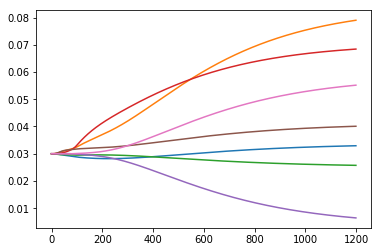

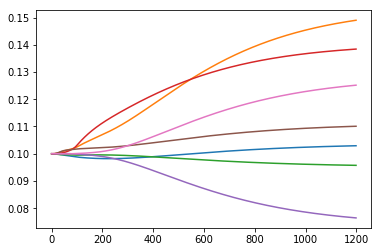

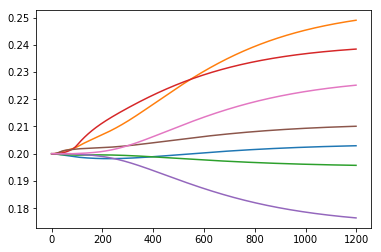

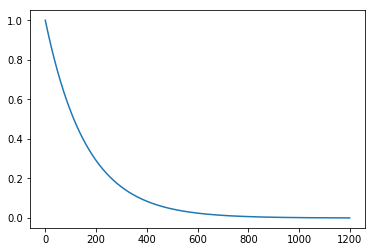

In [2]:
h5_path = '../data/traj_cut_Dec_8_7_00_PM/h5/expert_traj.h5'
num_dims, num_basis, num_sensors = 7, 19, 10                                                                                                                                                        
dmp_traj = DMPTrajectory(num_dims, num_basis, num_sensors)
dmp_traj.alpha = 5.0
dmp_traj.beta = 5.0/4
weights = train2(dmp_traj, h5_path)  

all_y, all_dy = [], []
for i, start_val in enumerate([0.03, 0.1, 0.2]):
    y, dy = dmp_traj.run_dmp_with_weights(
        weights,                                                                                                                                                      
        start_val * np.ones((dmp_traj.num_dims)),                                                                                                                                
        0.003,                                                                                                                                                         
        traj_time=1200)  
    plt.plot(y)
    plt.show()
    all_y.append(y)
    all_dy.append(dy)

all_y, all_dy = np.array(all_y), np.array(all_dy)
    
x = dmp_traj.get_x_values(0.003 * np.ones((1200,)))
plt.plot(x)
plt.show()

--Return--
> <ipython-input-3-9bdbbca5c5a1>(7)<module>()->None
-> pdb.set_trace()
(Pdb) c
(3, 1200, 7)
(3, 1200)
(3, 1200)
(3, 1200)


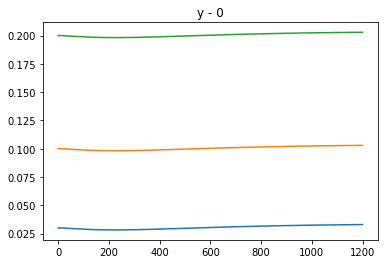

(3, 1200)
(3, 1200)
(3, 1200)


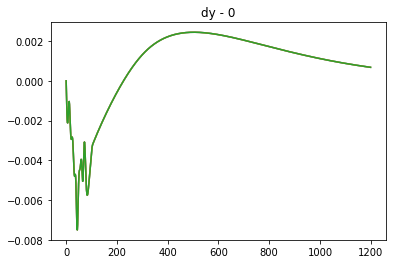

(3, 1200)
(3, 1200)
(3, 1200)


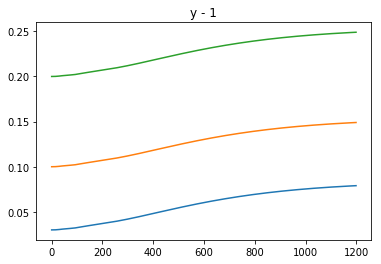

(3, 1200)
(3, 1200)
(3, 1200)


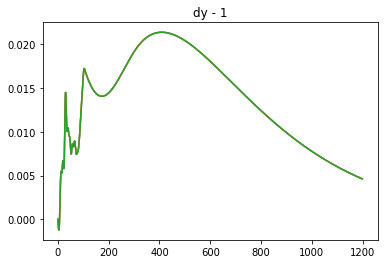

(3, 1200)
(3, 1200)
(3, 1200)


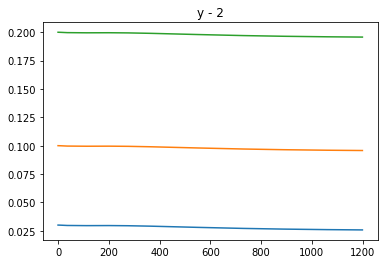

(3, 1200)
(3, 1200)
(3, 1200)


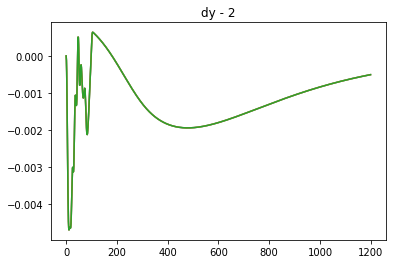

(3, 1200)
(3, 1200)
(3, 1200)


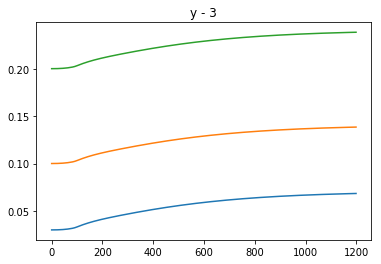

(3, 1200)
(3, 1200)
(3, 1200)


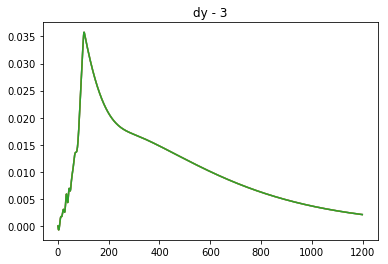

(3, 1200)
(3, 1200)
(3, 1200)


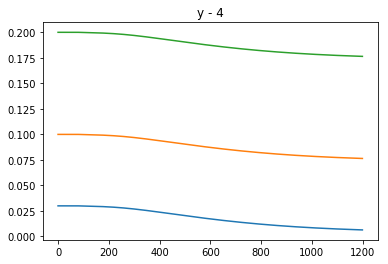

(3, 1200)
(3, 1200)
(3, 1200)


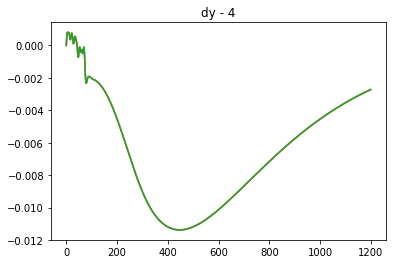

(3, 1200)
(3, 1200)
(3, 1200)


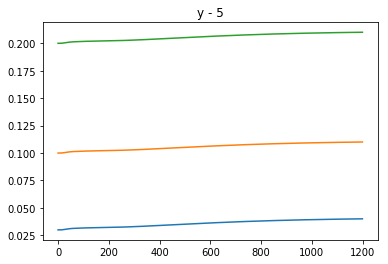

(3, 1200)
(3, 1200)
(3, 1200)


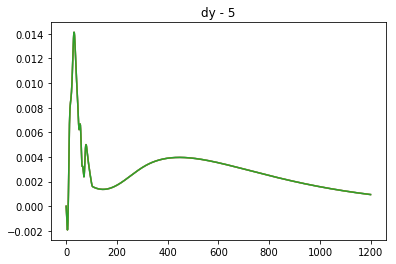

(3, 1200)
(3, 1200)
(3, 1200)


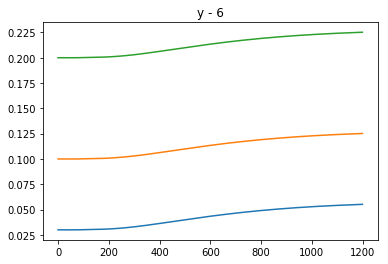

(3, 1200)
(3, 1200)
(3, 1200)


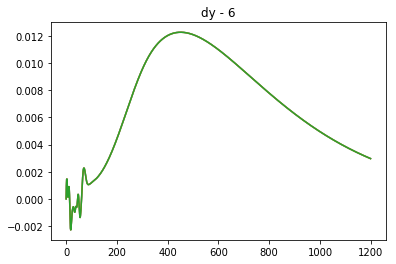

In [3]:
def visualize_dmp_trajectories(data, title=""):
    for i in range(data.shape[0]):
        print(data.shape)
        plt.plot(data[i, :])
        plt.title(title)
    plt.show()
pdb.set_trace()
print(all_y.shape)
for dim in range(all_y.shape[-1]):
    visualize_dmp_trajectories(all_y[:, :, dim], title="y - {}".format(dim))
    visualize_dmp_trajectories(all_dy[:, :, dim], title="dy - {}".format(dim))